# Mellors MSDS 696 Practicum 2 - Notebook 2 - NAs, EDA, Outliers

## Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
df_comb = pd.read_csv("/content/drive/MyDrive/Mellors - MSDS 696 - Practicum 2/df_comb.csv")

/tmp/ipython-input-1948366346.py:1: DtypeWarning: Columns (1,18,21,22,23,34,35,36,40,49,59,60,61,62,64,68,70,71,74,75,76,77,78,83) have mixed types. Specify dtype option on import or set low_memory=False.
  df_comb = pd.read_csv("/content/drive/MyDrive/Mellors - MSDS 696 - Practicum 2/df_comb.csv")


## Feature Cleanup and Selection

In [ ]:
# Lowercasing the features
df_comb.columns = df_comb.columns.str.lower()

In [ ]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101622 entries, 0 to 101621
Data columns (total 84 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        61634 non-null  float64
 1   age_group                  24580 non-null  object 
 2   amttotal                   61678 non-null  float64
 3   charge_number              24676 non-null  float64
 4   citwhere                   60952 non-null  float64
 5   combdrg2                   19679 non-null  float64
 6   created                    0 non-null      float64
 7   creator                    0 non-null      float64
 8   crimhist                   60327 non-null  float64
 9   crpts                      59429 non-null  float64
 10  daysdum                    61678 non-null  float64
 11  drugmin                    61678 non-null  float64
 12  econdum                    61678 non-null  float64
 13  edited                     0 non-null      f

In [ ]:
df_comb = df_comb.drop(columns = ["created", "creator", "edited", "editor"])

### v1-v21 Feature Naming

**Below**: using the reference material, I have renamed the columns back to their original naming scheme (this will help me later with combining features)

In [ ]:
df_comb = df_comb.rename(columns={"v1": "icpsr study number-8451",
                                  "v2": "icpsr edition number",
                                  "v3": "icpsr part number-1",
                                  "v4": "case number",
                                  "v5": "race of offender",
                                  "v6": "age at execution",
                                  "v7": "name of offender",
                                  "v8": "place of execution",
                                  "v9": "jurisdiction of execution",
                                  "v10": "crime committed",
                                  "v11": "method of execution",
                                  "v12": "date: day",
                                  "v13": "date: month",
                                  "v14": "date: year",
                                  "v15": "check digit",
                                  "v16": "state of execution",
                                  "v17": "county of conviction",
                                  "v18": "icpsr state code",
                                  "v19": "sex of offender",
                                  "v20": "compensation case",
                                  "v21": "occupation of offender"})

In [ ]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101622 entries, 0 to 101621
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        61634 non-null  float64
 1   age_group                  24580 non-null  object 
 2   amttotal                   61678 non-null  float64
 3   charge_number              24676 non-null  float64
 4   citwhere                   60952 non-null  float64
 5   combdrg2                   19679 non-null  float64
 6   crimhist                   60327 non-null  float64
 7   crpts                      59429 non-null  float64
 8   daysdum                    61678 non-null  float64
 9   drugmin                    61678 non-null  float64
 10  econdum                    61678 non-null  float64
 11  finedum                    61678 non-null  float64
 12  fine_amt                   16347 non-null  float64
 13  fine_suspended_amt         16299 non-null  f

### Feature Dropping and Renaming (Cont'd)

**Below:** I am dropping columns that I do not think will be important in accomplishing my overall goal.

In [ ]:
df_comb = df_comb.drop(columns=["crpts",
                                "fine_suspended_amt",
                                "generic_case_id",
                                "generic_offender_id",
                                "gis_id",
                                "globalid",
                                "objectid",
                                "rid",
                                "suprdum",
                                "icpsr study number-8451",
                                "date: day",
                                "date: month",
                                "check digit",
                                "icpsr state code",
                                "icpsr part number-1",
                                "case number",
                                "name of offender",
                                "icpsr edition number",
                                "place of execution",
                                "jurisdiction of execution",
                                "finedum",
                                "fine_amt",
                                "homicide_type",
                                "sentence_suspended_months",
                                "sentence_probation_months",
                                "sentence_imposed_months",
                                "sentence_year",
                                "senttcap",
                                "date: year",
                                "state of execution",
                                "compensation case",
                                "vvca_amt",
                                "totprisn",
                                "method of execution",
                                "county of conviction"])

In [ ]:
df_comb = df_comb.sort_index(axis=1)

**Below:** I am renaming the columns to be more descriptive. This will make it easier for me to understand what the columns represent as I combine and drop more features.

In [ ]:
df_comb = df_comb.rename(columns={"amttotal": "fine_amount",
                                  "citwhere": "citizenship_country",
                                  "charge_number" : "number_of_crimes_committed2",
                                  "combdrg2": "drug_type",
                                  "crimhist": "criminal_history_dummy",
                                  "daysdum": "sentenced_to_days_in_prison_dummy",
                                  "drugmin": "mandatory_min_months_drugs",
                                  "econdum" : "fine_imposed_dummy",
                                  "inout": "received_prison_nonprison_eligible_dummy",
                                  "newcit" : "citizenship_dummy",
                                  "newcnvtn" : "conviction_thru_plea_or_trial_dummy",
                                  "neweduc" : "education_level",
                                  "newrace" : "race2",
                                  "nocounts" : "number_of_crimes_committed",
                                  "nodrug" : "number_of_drugs",
                                  "numdepen" : "number_of_dependents",
                                  "offense_severity_group" : "offense_severity",
                                  "probdum" : "probation_given_dummy",
                                  "present" : "presentence_detention_status_dummy",
                                  "prisdum" : "received_prison_dummy",
                                  "restdum" : "restitution_given_dummy",
                                  "restitution_amt" : "fine_amount2",
                                  "sensplt0" : "sentence_in_months2",
                                  "sentimp" : "sentence_type2",
                                  "sexoffna" : "sex_offense_level",
                                  "statmax" : "maximum_allowed_sentence_months",
                                  "statmin" : "minimum_allowed_sentence_months",
                                  "sentence_to_serve_months" : "sentence_in_months",
                                  "sensplt" : "sentence_in_months2",
                                  "crime committed" : "number_of_crimes_committed3",
                                  "method_of_execution" : "execution_type",
                                  "sex of offender" : "gender2",
                                  "occupation of offender" : "offender_occupation",
                                  "monsex" : "gender3",
                                  "race of offender" : "race3",
                                  "xcrhissr" : "criminal_history_category",
                                  "xfolsor" : "final_offense_level"})


In [ ]:
df_comb = df_comb.drop(columns = ["received_prison_nonprison_eligible_dummy", "number_of_drugs", "offender_occupation", "mandatory_min_months_drugs"])

In [ ]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101622 entries, 0 to 101621
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   age                                  61634 non-null  float64
 1   age at execution                     15268 non-null  object 
 2   age_group                            24580 non-null  object 
 3   fine_amount                          61678 non-null  float64
 4   number_of_crimes_committed2          24676 non-null  float64
 5   citizenship_country                  60952 non-null  float64
 6   drug_type                            19679 non-null  float64
 7   number_of_crimes_committed3          15268 non-null  object 
 8   criminal_history_dummy               60327 non-null  float64
 9   sentenced_to_days_in_prison_dummy    61678 non-null  float64
 10  fine_imposed_dummy                   61678 non-null  float64
 11  gender                    

## Merging Like Features

### Age

**Below:** I am creating age label bins - as one of the "age" columns from the merged datasets  was in this format - and applying it to the non-binned "age" columns. I am then merging all the age column.

In [ ]:
labels = ['15-17','18-21','22-30','31-40','41-50','51-60','61-70','71+']
bins   = [15, 18, 22, 31, 41, 51, 61, 71, np.inf]

In [ ]:
df_comb["age_group2"] = pd.cut(pd.to_numeric(df_comb["age at execution"], errors='coerce'), bins=bins, labels=labels, right=False)

In [ ]:
df_comb['age_group3'] = pd.cut(pd.to_numeric(df_comb['age'], errors='coerce'), bins=bins, labels=labels, right=False)

In [ ]:
# Merge the the three "age_group" columns into a single "age_group" column
df_comb["age_group"] = df_comb['age_group'].fillna(df_comb["age_group2"]).fillna(df_comb["age_group3"])

# Drop the original 'age_group2' and 'age_group3' columns
df_comb = df_comb.drop(columns=["age_group2", "age_group3", "age", "age at execution"])

### Race

**Below:** I am merging the various "race" columns that were part of the merged datasets and removing the additional "race" columns.

In [ ]:
# Merge the the three "race" columns into a single "race" column
df_comb['race'] = df_comb['race'].fillna(df_comb['race2']).fillna(df_comb['race3'])

# Drop the original 'race2' and 'race3' columns
df_comb = df_comb.drop(columns=['race2', 'race3'])

### Gender

**Below:** I am merging the three "gender" features and dropping the additional "gender" columns.

In [ ]:
# Merge the the three "gender" columns into a single "gender" column
df_comb['gender'] = df_comb['gender'].fillna(df_comb['gender2']).fillna(df_comb['gender3'])

# Drop the original 'gender2' and 'gender3' columns
df_comb = df_comb.drop(columns=['gender2', 'gender3'])

### Sentence (In Months)

**Below:** I am merging the multiple "sentence_in_months" column and dropping the additional columns.

In [ ]:
# Merge the the three "sentence_in_months" columns into a single "sentence_in_months" column
df_comb['sentence_in_months'] = df_comb['sentence_in_months'].fillna(df_comb['sentence_in_months2']).fillna(df_comb['sentence_in_months3'])

# Drop the original 'sentence_in_months2' and 'sentence_in_months3' columns
df_comb = df_comb.drop(columns=['sentence_in_months2', 'sentence_in_months3'])

### Sentence Type

**Below:** I am merging the multiple "sentence_types" column and dropping the additional columns.

In [ ]:
# Merge the the three "sentence_type" columns into a single "sentence_type" column
df_comb['sentence_type'] = df_comb['sentence_type'].fillna(df_comb['sentence_type2']).fillna(df_comb['sentence_type3'])

# Drop the original 'sentence_type2' and 'sentence_type3' columns
df_comb = df_comb.drop(columns=['sentence_type2', 'sentence_type3'])

### Fine/Restitution Amount

**Below:** I am merging the multiple "fine_amount" column and dropping the additional columns.

In [ ]:
# Merge the the two "fine_amount" columns into a single "fine_amount" column
df_comb['fine_amount'] = df_comb['fine_amount'].fillna(df_comb['fine_amount2'])

# Drop the original 'fine_amount2' and 'fine_amount3' columns
df_comb = df_comb.drop(columns=['fine_amount2'])

### Number of Crimes Committed

**Below:** I am merging the multiple "sentence_type" column and dropping the additional columns.

In [ ]:
# Merge the the three "sentence_type" columns into a single "sentence_type" column
df_comb['number_of_crimes_committed'] = df_comb['number_of_crimes_committed'].fillna(df_comb['number_of_crimes_committed2']).fillna(df_comb['number_of_crimes_committed3'])

# Drop the original 'sentence_type2' and 'sentence_type3' columns
df_comb = df_comb.drop(columns=['number_of_crimes_committed2', 'number_of_crimes_committed3'])

In [ ]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101622 entries, 0 to 101621
Data columns (total 28 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   age_group                            93510 non-null   object 
 1   fine_amount                          78018 non-null   float64
 2   citizenship_country                  60952 non-null   float64
 3   drug_type                            19679 non-null   float64
 4   criminal_history_dummy               60327 non-null   float64
 5   sentenced_to_days_in_prison_dummy    61678 non-null   float64
 6   fine_imposed_dummy                   61678 non-null   float64
 7   gender                               101362 non-null  object 
 8   citizenship_dummy                    61342 non-null   float64
 9   conviction_thru_plea_or_trial_dummy  61678 non-null   float64
 10  education_level                      58600 non-null   float64
 11  number_of_cri

In [ ]:
df_comb.isna().sum()

,0
age_group,8112
fine_amount,23604
citizenship_country,40670
drug_type,81943
criminal_history_dummy,41295
sentenced_to_days_in_prison_dummy,39944
fine_imposed_dummy,39944
gender,260
citizenship_dummy,40280
conviction_thru_plea_or_trial_dummy,39944


## Handling NaNs, EDA, and Outliers

In [ ]:
df_comb.isna().sum()

,0
age_group,8112
fine_amount,23604
citizenship_country,40670
drug_type,81943
criminal_history_dummy,41295
sentenced_to_days_in_prison_dummy,39944
fine_imposed_dummy,39944
gender,260
citizenship_dummy,40280
conviction_thru_plea_or_trial_dummy,39944


### Age Group

**Below:** I am imputing the NaNs for "age_group" by randomly assigning the NaNs to each age_group based on what percentage of the dataset each age group takes up.

In [ ]:
df_comb['age_group'].value_counts()

,count
age_group,
31-40,27377
22-30,26815
41-50,18124
18-21,9179
51-60,8228
61-70,2439
15-17,842
71+,506


In [ ]:
age_counts = df_comb['age_group'].value_counts(dropna=True)
age_probs = age_counts / age_counts.sum()
print(age_probs)

age_group
31-40   0.29
22-30   0.29
41-50   0.19
18-21   0.10
51-60   0.09
61-70   0.03
15-17   0.01
71+     0.01
Name: count, dtype: float64


In [ ]:
age = df_comb.age_group.isna()
missing = age.sum()

In [ ]:
imputed_values = np.random.choice(age_probs.index, size=missing, p=age_probs.values)

In [ ]:
df_comb.loc[age, 'age_group'] = imputed_values

In [ ]:
df_comb.age_group.value_counts()

,count
age_group,
31-40,29693
22-30,29185
41-50,19713
18-21,9986
51-60,8926
61-70,2657
15-17,917
71+,545


In [ ]:
df_comb.age_group.isna().sum()

np.int64(0)

**Below:** From the bar graph below, we can see that the vast majority of the individuals in the dataset are between the ages of 22 and 40 years old.

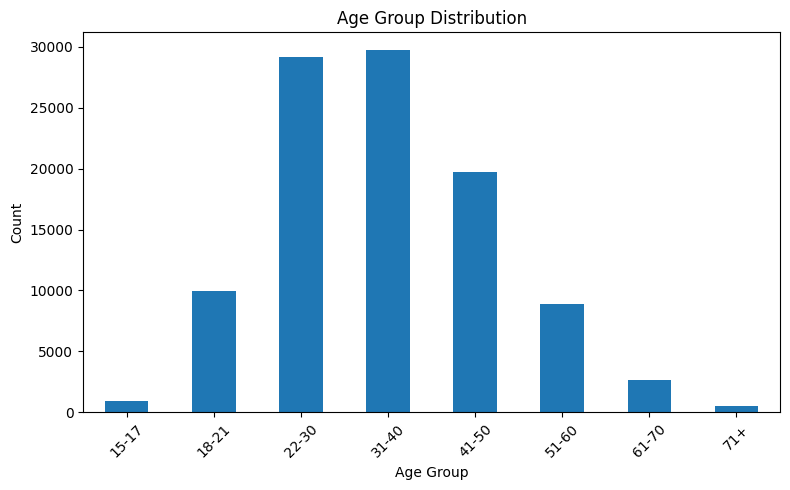

In [ ]:
age_counts = df_comb['age_group'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
age_counts.plot(kind='bar')

plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Citizenship Country / Citizenship Dummy

Dropping the Citizen Country column and working on filling the NaNs for the Citizenship Dummy, since I want to look at the punishment severity between citizens and foreign individuals, and their particular country of citizenship isn't as important.

**Note:** I am re-encoding because I added a new integer and I will fo "get_dummies" when it is time to prep for my models.

0 = U.S. Citizen     
1 = Foreign Citizen    
2 = Unknown Citizenship Status      

In [ ]:
df_comb.citizenship_country.value_counts()

,count
citizenship_country,
211.00,40038
49.00,13818
40.00,1839
37.00,1211
30.00,832
...,...
70.00,1
65.00,1
121.00,1


In [ ]:
df_comb.citizenship_dummy.value_counts()

,count
citizenship_dummy,
0.00,40038
1.00,21304


In [ ]:
df_comb['citizenship_dummy'] = df_comb['citizenship_dummy'].fillna(2)

In [ ]:
df_comb.citizenship_dummy.value_counts()

,count
citizenship_dummy,
2.00,40280
0.00,40038
1.00,21304


In [ ]:
df_comb = df_comb.drop(columns=['citizenship_country'])

In [ ]:
df_comb.citizenship_dummy.isna().sum()

np.int64(0)

**Below:** From the bar chart, we can see that, for the known citizenship status, that the majority of the individuals were U.S. citizens, with an equally large amount of having an unknown (or unlisted) citizenship status.

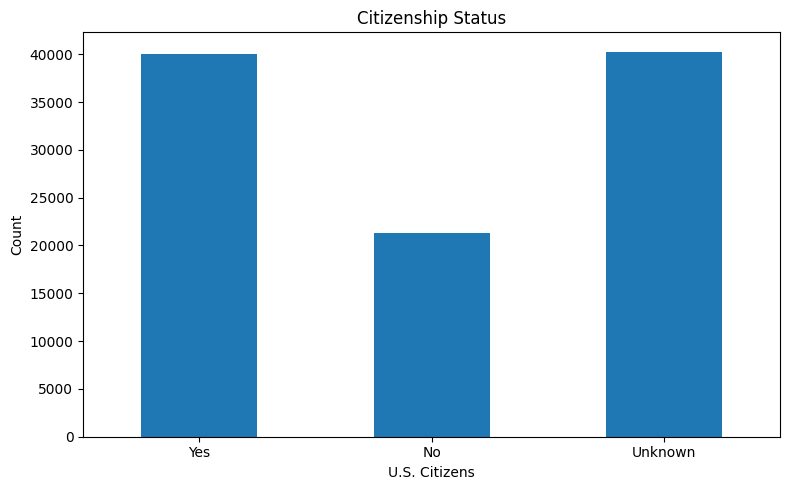

In [ ]:
citizenship = df_comb['citizenship_dummy'].value_counts().sort_index()

labels = {0.0: "Yes", 1.0: "No", 2.0: "Unknown"}

plt.figure(figsize=(8, 5))
ax = citizenship.plot(kind='bar')

ax.set_title('Citizenship Status')
ax.set_xlabel('U.S. Citizens')
ax.set_ylabel('Count')

ax.set_xticklabels([labels[idx] for idx in citizenship.index], rotation=0)

plt.tight_layout()
plt.show()

## Drug Type

Since this feature is missing 81,948 (~ 80%) of the entries. I am opting to drop this feature

In [ ]:
df_comb.drug_type.isna().sum()

np.int64(81943)

In [ ]:
df_comb = df_comb.drop(columns = ["drug_type"])

## Criminal History Dummy

**Below:** As I did with the age_group, I used the percentage of the dataset each value occurs and randomly assigned the same ratio of NaNs to each value.

In [ ]:
df_comb.criminal_history_dummy.isna().sum()

np.int64(41295)

In [ ]:
df_comb.criminal_history_dummy.value_counts()

,count
criminal_history_dummy,
1.00,51610
0.00,8717


**Below:** We can see that 86% of the entries in the data set had a criminal history

In [ ]:
crimhist_counts = df_comb['criminal_history_dummy'].value_counts(dropna=True)
crimhist_probs = crimhist_counts / crimhist_counts.sum()
print(crimhist_probs)

criminal_history_dummy
1.00   0.86
0.00   0.14
Name: count, dtype: float64


In [ ]:
crimhist = df_comb.criminal_history_dummy.isna()
missing = crimhist.sum()
imputed_values = np.random.choice(crimhist_probs.index, size=missing, p=crimhist_probs.values)
df_comb.loc[crimhist, 'criminal_history_dummy'] = imputed_values

In [ ]:
df_comb.criminal_history_dummy.value_counts()

,count
criminal_history_dummy,
1.00,86867
0.00,14755


**Below:** The bar chart shows that the vast majority (over 80,000 / 86%) had a criminal history

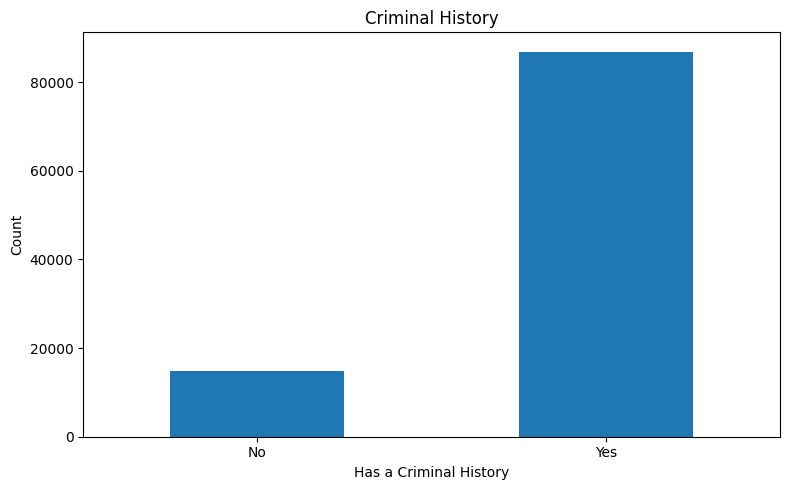

In [ ]:
crimhist = df_comb['criminal_history_dummy'].value_counts().sort_index()

labels = {0.0: "No", 1.0: "Yes"}

plt.figure(figsize=(8, 5))
ax = crimhist.plot(kind='bar')

ax.set_title('Criminal History')
ax.set_xlabel('Has a Criminal History')
ax.set_ylabel('Count')

ax.set_xticklabels([labels[idx] for idx in crimhist.index], rotation=0)

plt.tight_layout()
plt.show()

## Gender

**Below:** Because the different datasets had diifferent labels for the genders, I had renames them all to either "F" (female) or "M" (male), and given that men made up the majority of the dataset, I opted to fill in the NaNs as "M" (male).

In [ ]:
df_comb.gender.value_counts()

,count
gender,
0.00,53929
M,22556
1,14750
1.00,7716
F,1893
2,364
,154


In [ ]:
df_comb['gender'] = df_comb['gender'].replace({0.0 : "M"})
df_comb['gender'] = df_comb['gender'].replace({"2" : "F"})
df_comb['gender'] = df_comb['gender'].replace({"1" : "F"})
df_comb['gender'] = df_comb['gender'].replace({1.0 : "F"})
df_comb['gender'].fillna('M', inplace=True)

/tmp/ipython-input-2266578079.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_comb['gender'].fillna('M', inplace=True)


In [ ]:
df_comb.gender.value_counts()

,count
gender,
M,76745
F,24723
,154


In [ ]:
df_comb['gender'] = df_comb['gender'].astype(str).str.strip()
df_comb.loc[~df_comb['gender'].isin(['M', 'F']), 'gender'] = 'M'

In [ ]:
df_comb['gender'].value_counts(dropna=False)

,count
gender,
M,76899
F,24723


**Below:** From the bar chart below, we can see that the vast majority of the individuals in the dataset are male.

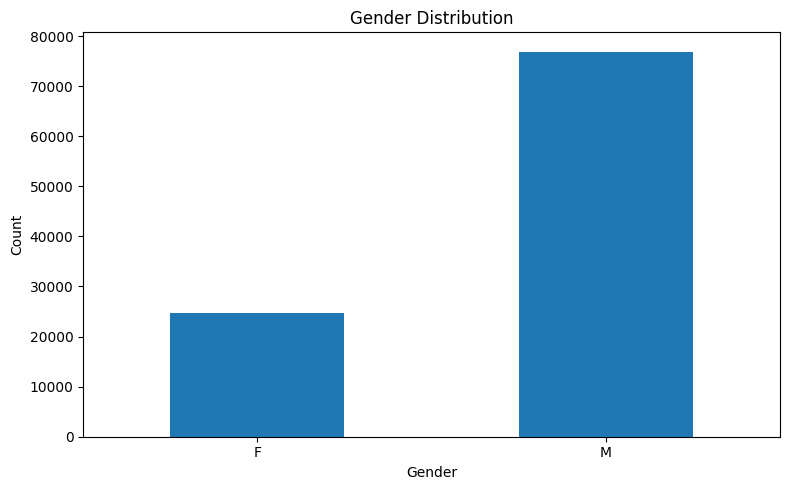

In [ ]:
gender = df_comb['gender'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
gender.plot(kind='bar')

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Sentence in Months

Since there is only 120 missing values, I am opting to drop those entries, as this makes up a very small portion of my 100,000 entry dataset. This will ultimately be the most important feature for setting my target feature.

In [ ]:
df_comb.dropna(subset=['sentence_in_months'], inplace=True)

## Race

**Below:** Since the various datasets had different labels for the different races, I used the provided materials to relabel them to the appropriate groups.

In [ ]:
df_comb.race.value_counts()

,count
race,
3.00,30472
Black,22383
2.00,14997
1.00,12866
2,7353
1,6344
6.00,2897
Other or Unknown,1180
White,912


In [ ]:
df_comb['race'] = df_comb['race'].replace({"Other or Unknown" : "Other"})
df_comb['race'] = df_comb['race'].replace({"6" : "Other"})
df_comb['race'] = df_comb['race'].replace({"3" : "Native American"})
df_comb['race'] = df_comb['race'].replace({"4" : "AAPI"})
df_comb['race'] = df_comb['race'].replace({"Asian" : "AAPI"})
df_comb['race'] = df_comb['race'].replace({"Pacific Islander" : "AAPI"})
df_comb['race'] = df_comb['race'].replace({"5" : "Hispanic"})
df_comb['race'] = df_comb['race'].replace({"2" : "Black"})
df_comb['race'] = df_comb['race'].replace({"1" : "White"})
df_comb['race'] = df_comb['race'].replace({1.0 : "White"})
df_comb['race'] = df_comb['race'].replace({2.0 : "Black"})
df_comb['race'] = df_comb['race'].replace({3.0 : "Hispanic"})
df_comb['race'] = df_comb['race'].replace({6.0 : "Other"})
df_comb['race'].fillna('Other', inplace=True)

/tmp/ipython-input-1313842301.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_comb['race'].fillna('Other', inplace=True)


In [ ]:
df_comb['race'] = df_comb['race'].astype(str).str.strip()
races = ['Black', 'Hispanic', 'White', 'Other', 'Native American', 'AAPI']
df_comb.loc[~df_comb['race'].isin(races), 'race'] = 'Other'

In [ ]:
df_comb.race.value_counts()

,count
race,
Black,44733
Hispanic,30875
White,20122
Other,5236
Native American,371
AAPI,165


**Below:** From the pie chart below, we can see that 44% of the entries are black individuals and 30% are hispanic, combined, these two races make up nearly 3/4ths of all individuals. White individuals made up less than 20%, and even fewer Asian Americans / Pacific Islanders and Native Americans.

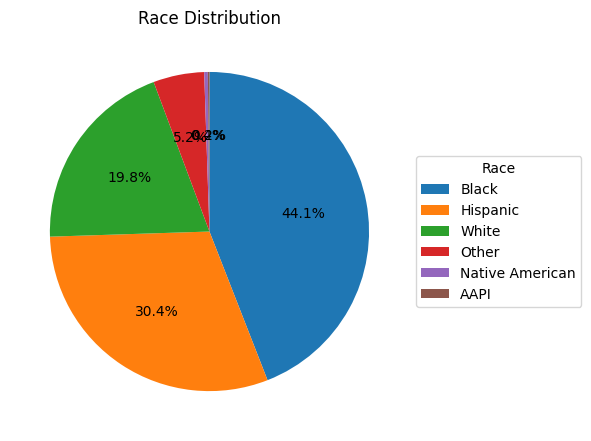

In [ ]:
race_counts = df_comb['race'].value_counts()

plt.figure(figsize=(6, 6))
race_counts.plot(
    kind='pie',
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False)

plt.title('Race Distribution')
plt.ylabel('')  # no y-label

plt.legend(
    race_counts.index,
    title='Race',
    loc='center left',
    bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.show()

## Number of Dependents

**Below:** I have clipped the number of dependence to 10 - meaning that those who were above 10, were relabeled to 10. As I felt that more than that was highly unlikely.

In [ ]:
df_comb['number_of_dependents'] = df_comb['number_of_dependents'].clip(upper=10)

In [ ]:
df_comb.number_of_dependents.value_counts()

,count
number_of_dependents,
0.00,23015
1.00,10852
2.00,9713
3.00,6720
4.00,3690
5.00,1770
6.00,847
7.00,398
8.00,174


**Below:** To impute the NaNs for dependents, I grouped age, gender, and race and filled in the NaNs based on the median number of dependents based on the preictors.

In [ ]:
dependents_median = df_comb.groupby(['age_group','gender','race'])['number_of_dependents'].transform('median')
df_comb['number_of_dependents'] = df_comb['number_of_dependents'].fillna(dependents_median).fillna(df_comb['number_of_dependents'].median())

**Below:** The bar chart below shows that the majority of the incarcerated (~70%) had either no dependents or one dependent, with a small fractrion with 5 or more dependents.

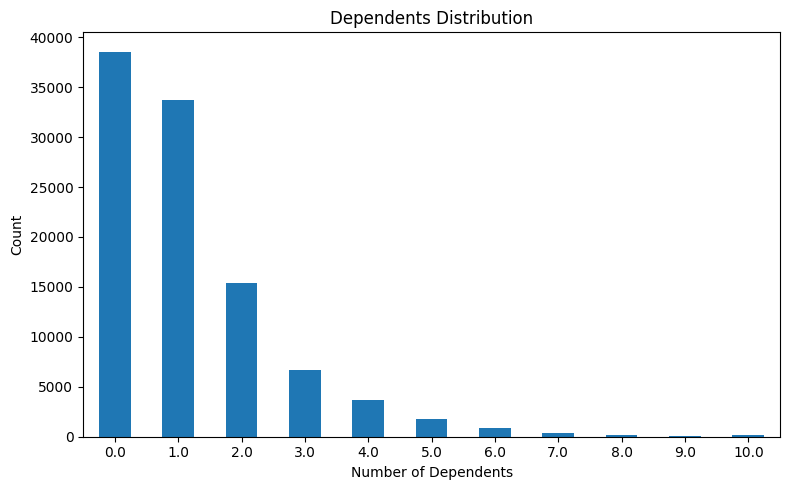

In [ ]:
dependents = df_comb['number_of_dependents'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
dependents.plot(kind='bar')

plt.title('Dependents Distribution')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Education Level

**Below:** As I did for number of dependents, I used demographics that I believed would help me with finding good values to impute for NaNs. in this case, I took race, gender, age, and number of dependents, and used the mode for missing NaNs.

**Important Note:** I am aware that by imputing using these demographics, that I might be perpetuating biasness. However, this was the best way I could think of to impute quickly and with some level of accuracy.

In [ ]:
df_comb.education_level.value_counts()

,count
education_level,
1.00,24412
3.00,19526
5.00,10818
6.00,3844


In [ ]:
edu_group_mode = df_comb.groupby(['gender', 'race', 'age_group', 'number_of_dependents'])['education_level'].transform(lambda x: x.mode().iat[0] if not x.mode().empty else np.nan)
df_comb['education_level'] = df_comb['education_level'].fillna(edu_group_mode).fillna(df_comb['education_level'].mode()[0])


In [ ]:
df_comb.education_level.value_counts()

,count
education_level,
3.00,42455
1.00,35614
5.00,19483
6.00,3950


**Below:** We can see that the majority of individuals had at least a high school degree, followed closely by those without completing high school. This shows that the majority of the individuals had little-to-no higher education. College graduates made up the least amount of the individuals.

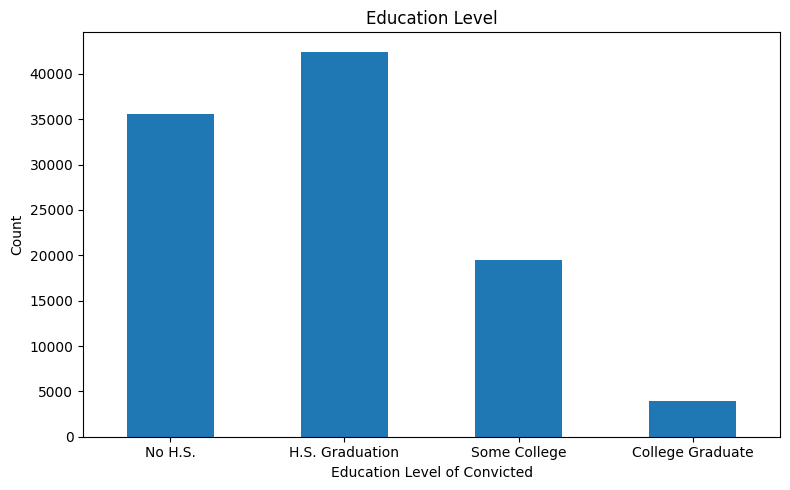

In [ ]:
education = df_comb['education_level'].value_counts().sort_index()

labels = {1.0: "No H.S.", 3.0: "H.S. Graduation", 5.0: "Some College", 6.0: "College Graduate"}

plt.figure(figsize=(8, 5))
ax = education.plot(kind='bar')

ax.set_title('Education Level')
ax.set_xlabel('Education Level of Convicted')
ax.set_ylabel('Count')

ax.set_xticklabels([labels[idx] for idx in education.index], rotation=0)

plt.tight_layout()
plt.show()

## Sentence to Days in Prison Dummy

**Below:** To impute for the sentence to days in prison dummy, I opted to used the sentence to months in prison as the predictor, where if they were sentenced to more than 0 months in prison, they were assigned as having been sentenced to days in prison.

In [ ]:
df_comb.sentenced_to_days_in_prison_dummy.value_counts(dropna=False)

,count
sentenced_to_days_in_prison_dummy,
0.00,57908
NaN,39824
1.00,3770


In [ ]:
df_comb['sentenced_to_days_in_prison_dummy'] = df_comb['sentenced_to_days_in_prison_dummy'].fillna((df_comb['sentence_in_months'] > 0).astype(int))

In [ ]:
df_comb.sentenced_to_days_in_prison_dummy.value_counts(dropna=False)

,count
sentenced_to_days_in_prison_dummy,
0.00,62451
1.00,39051


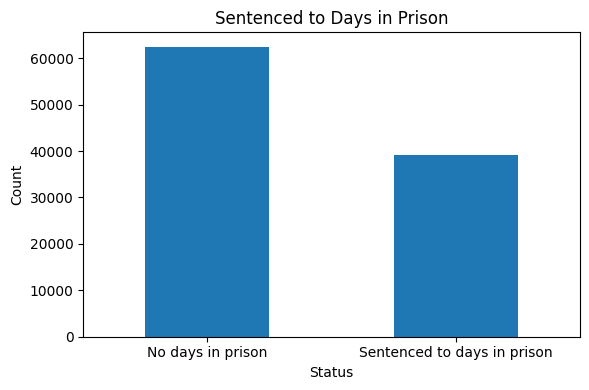

In [ ]:
sent_counts = df_comb['sentenced_to_days_in_prison_dummy'].value_counts().sort_index()

labels = {0.0: "No days in prison", 1.0: "Sentenced to days in prison"}

plt.figure(figsize=(6, 4))
ax = sent_counts.plot(kind='bar')

ax.set_title('Sentenced to Days in Prison')
ax.set_xlabel('Status')
ax.set_ylabel('Count')

ax.set_xticklabels([labels[idx] for idx in sent_counts.index], rotation=0)

plt.tight_layout()
plt.show()

## Fine Imposed Dummy

**Below:** To impute the NaNs for whether a fine was imposed or not, I used the fine_amount and restitution_given_dummy features. A fine was considered imposed if the fine_amount was greater than 0 or if the individual was required to pay restitution to victims.

In [ ]:
df_comb['fine_imposed_dummy'] = df_comb['fine_imposed_dummy'].fillna(((df_comb['fine_amount'] > 0) | (df_comb['restitution_given_dummy'] == 1)).astype(int))

In [ ]:
df_comb.fine_imposed_dummy.value_counts(dropna=False)

,count
fine_imposed_dummy,
0.00,87795
1.00,13707


In [ ]:
df_comb.fine_amount.value_counts()

,count
fine_amount,
0.00,65418
1500.00,607
1000.00,582
500.00,532
2000.00,401
...,...
2722932.00,1
11072.00,1
75880.00,1


**Below:** The bar chart below shows that the majority of individuals either paid no fine or the fine was not specified (also labelled as 0.0)

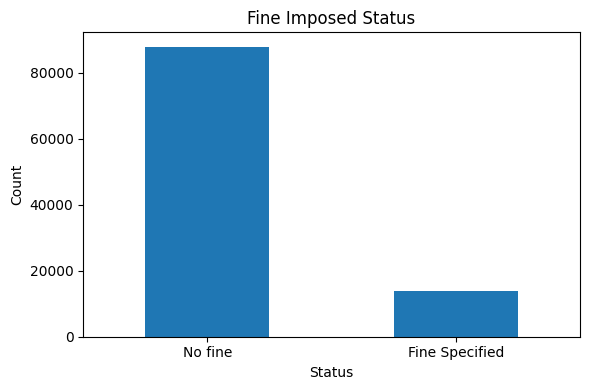

In [ ]:
fine_counts = df_comb['fine_imposed_dummy'].value_counts().sort_index()
labels = {0.0: 'No fine', 1.0: 'Fine Specified'}

plt.figure(figsize=(6, 4))
ax = fine_counts.plot(kind='bar')
ax.set_title('Fine Imposed Status')
ax.set_xlabel('Status')
ax.set_ylabel('Count')
ax.set_xticklabels([labels[idx] for idx in fine_counts.index], rotation=0)

plt.tight_layout()
plt.show()

## Received Prison Dummy

**Below:** To impute for the NaNs for received_prison_dummy, I used the the sentence_in_months feature, where if the individual received more than 0 months in prison they were assigned as receiving prison (1) for the received_prison_dummy.

In [ ]:
df_comb['received_prison_dummy'] = df_comb['received_prison_dummy'].fillna((df_comb['sentence_in_months'] > 0).astype(int))

In [ ]:
df_comb.received_prison_dummy.value_counts(dropna=False)

,count
received_prison_dummy,
1.00,91698
0.00,9804


**Below:** The bar chart below shows that ~90% of all individuals received some level of incarceration.

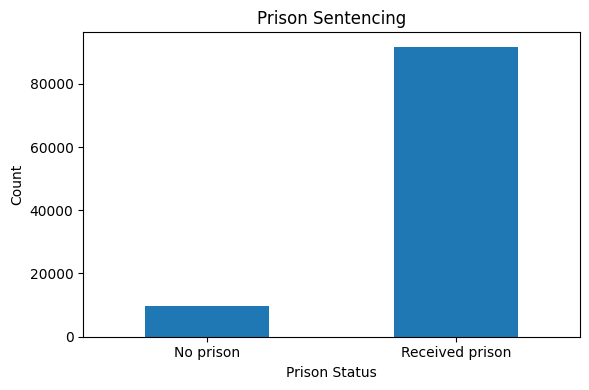

In [ ]:
prison_counts = df_comb['received_prison_dummy'].value_counts().sort_index()

labels = {0.0: 'No prison', 1.0: 'Received prison'}

plt.figure(figsize=(6, 4))
ax = prison_counts.plot(kind='bar')

ax.set_title('Prison Sentencing')
ax.set_xlabel('Prison Status')
ax.set_ylabel('Count')

ax.set_xticklabels([labels[idx] for idx in prison_counts.index], rotation=0)

plt.tight_layout()
plt.show()

## Presentence Detention Status Dummy

**Below:** For imputing presentence_detention_status_dummy, I created a new status (5) for the unknowns.

In [ ]:
df_comb.presentence_detention_status_dummy.value_counts(dropna=False)

,count
presentence_detention_status_dummy,
1.00,44426
NaN,42056
2.00,11531
3.00,3136
4.00,353


In [ ]:
df_comb['presentence_detention_status_dummy'] = df_comb['presentence_detention_status_dummy'].fillna(5.0)

In [ ]:
df_comb.presentence_detention_status_dummy.value_counts(dropna=False)

,count
presentence_detention_status_dummy,
1.00,44426
5.00,42056
2.00,11531
3.00,3136
4.00,353


## Conviction Thru Plea or Trial Dummy




**Below:** Just as I did above, for the conviction_thru_plea_or_trial_dummy I created a new value (2.0) specifically for the NaNs.

In [ ]:
df_comb.conviction_thru_plea_or_trial_dummy.value_counts(dropna=False)

,count
conviction_thru_plea_or_trial_dummy,
0.00,59922
NaN,39824
1.00,1756


In [ ]:
df_comb['conviction_thru_plea_or_trial_dummy'] = df_comb['conviction_thru_plea_or_trial_dummy'].fillna(2.0)

**Below:** We can see that for the known results of conviction, that nearly all of them were through a plea deal and very few were through an actual. About 1/3rd of the entries are unknown.

In [ ]:
df_comb.conviction_thru_plea_or_trial_dummy.value_counts(dropna=False)

,count
conviction_thru_plea_or_trial_dummy,
0.00,59922
2.00,39824
1.00,1756


## Probation Given Dummy

**Below:** for the NaNs for probation_given_dummy, I created a new value (2.0) for the unknowns.

In [ ]:
df_comb.probation_given_dummy.value_counts(dropna=False)

,count
probation_given_dummy,
0.00,56679
NaN,39824
1.00,4999


In [ ]:
df_comb['probation_given_dummy'] = df_comb['probation_given_dummy'].fillna(2.0)

In [ ]:
df_comb.probation_given_dummy.value_counts(dropna=False)

,count
probation_given_dummy,
0.00,56679
2.00,39824
1.00,4999


**Below:**  the bar chart below shows that the majority of the individuals did not receive probation. The source material does not specify, but given the high amount of individuals incarcerated and the low amount of individuals given probation, I am going to hypothesize that this refers to the individuals - in most cases - receiving probation in lieu of prison time.

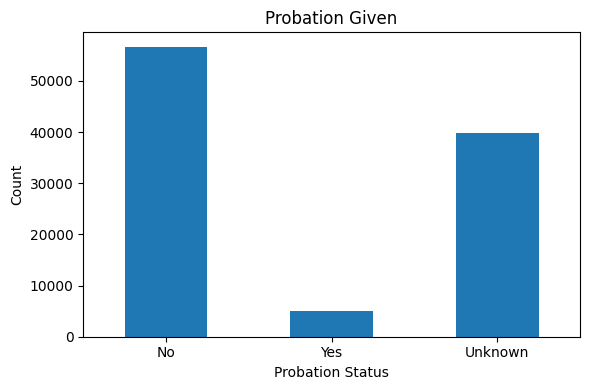

In [ ]:
probation = df_comb['probation_given_dummy'].value_counts().sort_index()

labels = {0.0:'No', 1.0:'Yes', 2.0:'Unknown'}

plt.figure(figsize=(6,4))
ax = probation.plot(kind='bar')

ax.set_title('Probation Given')
ax.set_xlabel('Probation Status')
ax.set_ylabel('Count')
ax.set_xticklabels([labels[i] for i in probation.index], rotation=0)

plt.tight_layout()
plt.show()

###  Offense


In [ ]:
df_comb.offense.value_counts()

,count
offense,
Distribution Of a Controlled Substance,2962
Poss W/I to Dist a Controlled Substance,2361
Robbery,2158
Assault With A Dangerous Weapon,1526
Carry Pistol W/O Lic -Outside Home/Business,1406
...,...
APO,1
BAIL REFORM ACT-FELONY,1
Pandering a Mnior,1


**Below:** The bar chart below shows the most common types of crime are related to drug possession and distribution, robbery or burglary, and assualt.

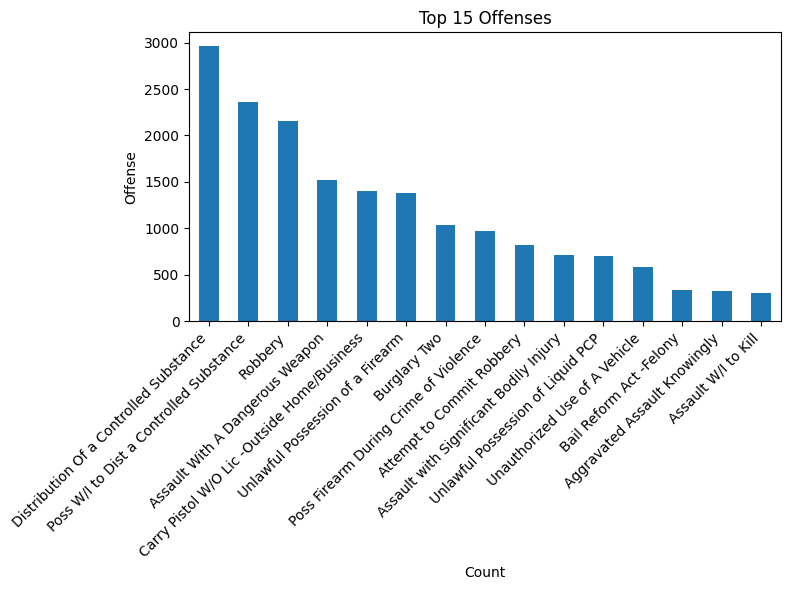

In [ ]:
top15 = 15
offense_counts = df_comb['offense'].value_counts().head(top15)

plt.figure(figsize=(8, 6))
ax = offense_counts.plot(kind='bar')

ax.set_title(f'Top 15 Offenses')
ax.set_xlabel('Count')
ax.set_ylabel('Offense')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Sex Offense Level

**Below** Since the sex_offense_level of 0.00 made up nearly all the entries of the known values, I decided impute all the unknowns to that value, also. I feel that the distribution of the unknowns outside of 0.00 is likely negligible.

In [ ]:
df_comb.sex_offense_level.value_counts()

,count
sex_offense_level,
0.00,59351
37.00,33
34.00,16
24.00,1
32.00,1


In [ ]:
df_comb['sex_offense_level'] = df_comb['sex_offense_level'].fillna(0.0)

In [ ]:
df_comb.sex_offense_level.value_counts()

,count
sex_offense_level,
0.00,101451
37.00,33
34.00,16
24.00,1
32.00,1


## Criminal History Category

**Below:** As I did for earlier features, for criminal_history_category I used random placement based on how much each the values made up of the dataset.

In [ ]:
ch_dist = df_comb['criminal_history_category'].value_counts(normalize=True, dropna=True)
df_comb.loc[df_comb['criminal_history_category'].isna(), 'criminal_history_category'] = np.random.choice(ch_dist.index, size=df_comb['criminal_history_category'].isna().sum(), p=ch_dist.values)

In [ ]:
df_comb['criminal_history_category'].value_counts()

,count
criminal_history_category,
1.00,48251
2.00,16450
3.00,14878
6.00,9121
4.00,7166
5.00,5636


## Final Offense Level

**Below:** For the final_offense_level, I took the same approach as other features, where I randomly assigned them based on what percentange of the dataset that the value took up.

In [ ]:
missing = df_comb['final_offense_level'].isna()
levels = df_comb.loc[~missing, 'final_offense_level'].dropna().unique()
levels = np.sort(levels)
np.random.seed(4)
df_comb.loc[missing, 'final_offense_level'] = np.random.choice(
    levels,
    size=missing.sum(),
    replace=True)

In [ ]:
num_cols = df_comb.select_dtypes(include='number').columns

corr_matrix = df_comb[num_cols].corr()

**Below:** At this point, since I have handled many of the NaNs, I thought this would be a good time to create a correlation matrix, that I can use to help impute some of the remaining NaNs.

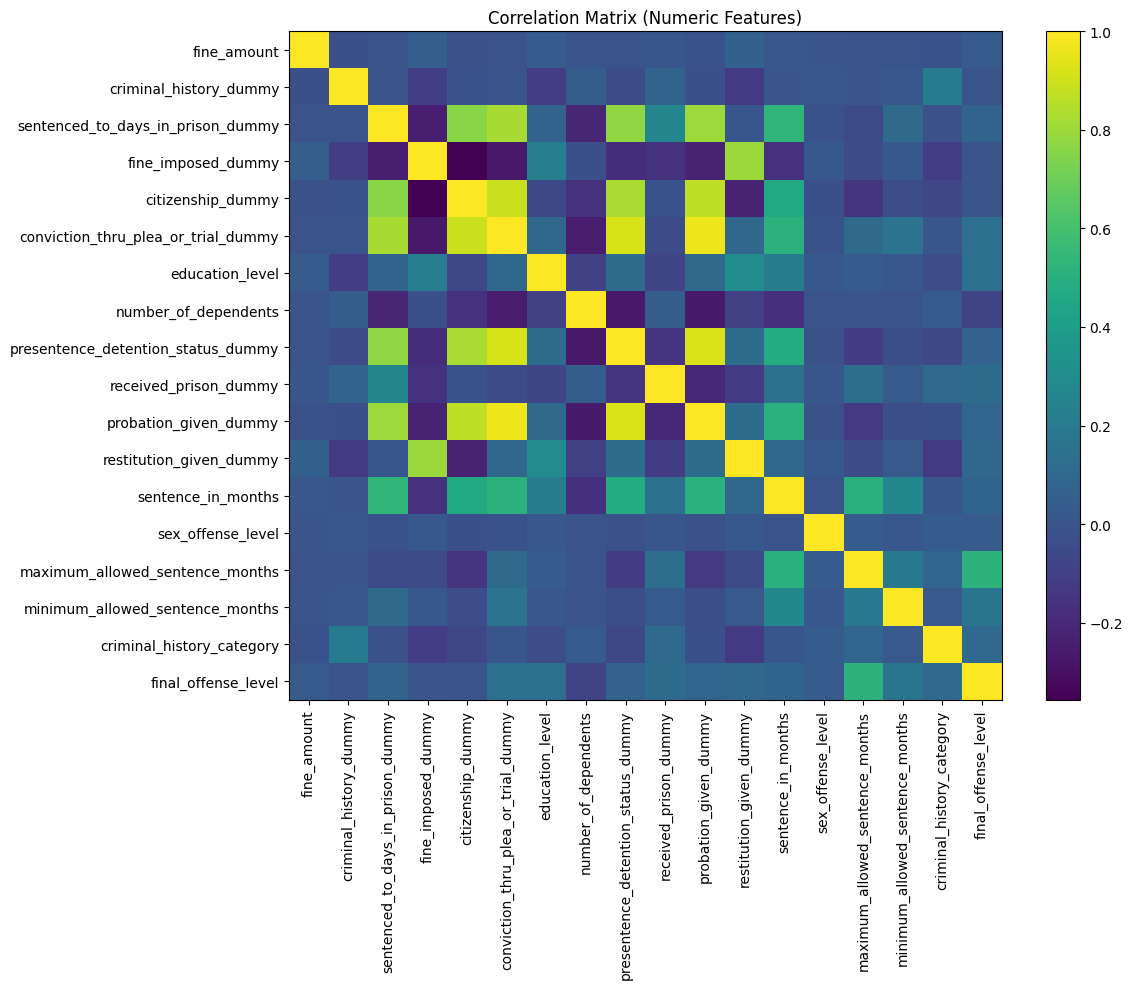

In [ ]:
plt.figure(figsize=(12, 10))

im = plt.imshow(corr_matrix, aspect='auto')
plt.colorbar(im)

plt.title('Correlation Matrix (Numeric Features)')
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)

plt.tight_layout()
plt.show()

<Axes: xlabel='final_offense_level'>

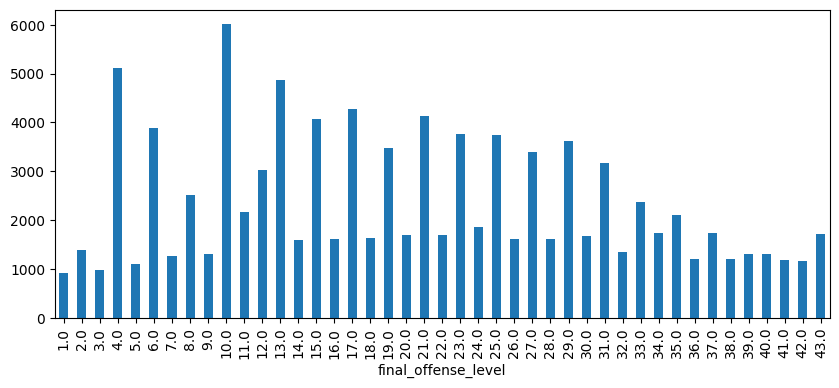

In [ ]:
df_comb['final_offense_level'].value_counts().sort_index().plot(kind='bar', figsize=(10,4))

## Restitution Given Dummy

**Below:** I imputed restitution_given_dummy based on whethere a fine was imposed or not (fine_imposed_dummy).

In [ ]:
df_comb['restitution_given_dummy'] = df_comb['restitution_given_dummy'].fillna(df_comb['fine_imposed_dummy'])

In [ ]:
df_comb['restitution_given_dummy'].value_counts()

,count
restitution_given_dummy,
0.00,91835
1.00,9667


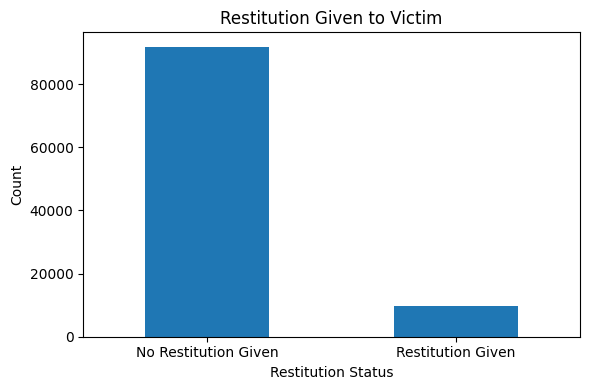

In [ ]:
restitution = df_comb['restitution_given_dummy'].value_counts().sort_index()

labels = {0.0: 'No Restitution Given', 1.0: 'Restitution Given'}

plt.figure(figsize=(6, 4))
ax = restitution.plot(kind='bar')

ax.set_title('Restitution Given to Victim')
ax.set_xlabel('Restitution Status')
ax.set_ylabel('Count')

ax.set_xticklabels([labels[idx] for idx in restitution.index], rotation=0)

plt.tight_layout()
plt.show()

## Fine Amount

**Below:** The Box and Whisker plot shows the quartiles of the fine amounts. Given that most  individuals didn't pay a fine 9or it was not specified) the median is at 0 with the max being an insanely large number. Since fionces are subject and it is not uncommon to have large fines, I am opting not to impute the outliers for this feature.

In [ ]:
df_comb.loc[df_comb['fine_imposed_dummy'] == 0, 'fine_amount'] = 0

In [ ]:
df_comb['fine_amount'].describe()

,fine_amount
count,101502.00
mean,139502.33
std,6319653.49
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,1585401099.00


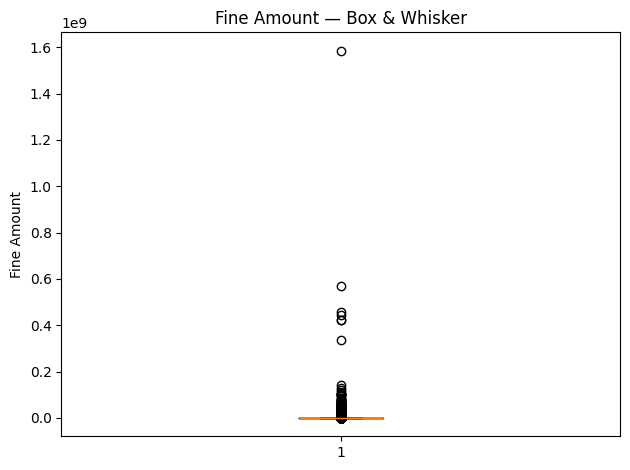

In [ ]:
plt.figure()
plt.boxplot(df_comb['fine_amount'].values, vert=True, showfliers=True)
plt.title('Fine Amount — Box & Whisker')
plt.ylabel('Fine Amount')
plt.tight_layout()
plt.show()

## Maximum Allowed Sentence in Months

**Below:**  I am training a Logistic Regression model to guess missing minimum_allowed_sentence_months values using sentence_in_months and final_offense_level. The model takes the ten (10) most common minimum sentences, trains on the rows with known values in that top-10 set, then uses that trained model to predict and fill in the missing minimum sentences for the rest of the rows.

In [ ]:
df_comb.maximum_allowed_sentence_months.value_counts()

,count
maximum_allowed_sentence_months,
240.00,13608
120.00,13271
9996.00,9941
24.00,4694
60.00,3914
...,...
4380.00,1
3900.00,1
6228.00,1


In [ ]:
features = ['sentence_in_months', 'final_offense_level']

# Top 10 most frequent max-sentence values
max_counts = df_comb['maximum_allowed_sentence_months'].value_counts(dropna=True)
top10_values = max_counts.head(10).index

# Training: known target and in top 10 values
known = df_comb['maximum_allowed_sentence_months'].notna()
top10 = df_comb['maximum_allowed_sentence_months'].isin(top10_values)
train_top10 = known & top10

X_train = df_comb.loc[train_top10, features].copy()
y_train = df_comb.loc[train_top10, 'maximum_allowed_sentence_months'].copy()

# Handle NaNs with column medians
X_train = X_train.fillna(X_train.median())

# Build and fit logistic regression
clf = make_pipeline(StandardScaler(),LogisticRegression(multi_class='multinomial', max_iter=1000))

clf.fit(X_train, y_train)

# Predict for rows with missing maximum__allowed_sentence_months
missing = df_comb['maximum_allowed_sentence_months'].isna()
X_missing = df_comb.loc[missing, features].copy()
X_missing = X_missing.fillna(X_train.median())

pred_classes = clf.predict(X_missing)

# Impute the predictions back into the column
df_comb.loc[missing, 'maximum_allowed_sentence_months'] = pred_classes

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
df_comb.maximum_allowed_sentence_months.value_counts()

,count
maximum_allowed_sentence_months,
9996.00,26433
240.00,25483
120.00,19870
24.00,8153
360.00,4066
...,...
4380.00,1
3900.00,1
6228.00,1


In [ ]:
df_comb['maximum_allowed_sentence_months'].describe()

,maximum_allowed_sentence_months
count,101502.00
mean,2764.52
std,4297.82
min,12.00
25%,120.00
50%,240.00
75%,9996.00
max,17040.00


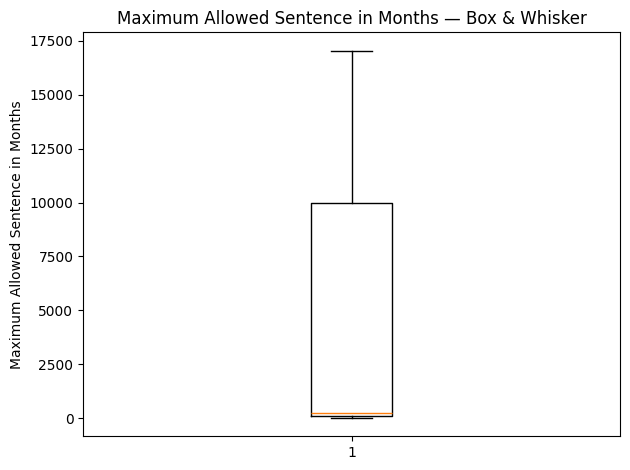

In [ ]:
plt.figure()
plt.boxplot(df_comb['maximum_allowed_sentence_months'].values, vert=True, showfliers=True)
plt.title('Maximum Allowed Sentence in Months — Box & Whisker')
plt.ylabel('Maximum Allowed Sentence in Months')
plt.tight_layout()
plt.show()

## Minimum Allowed Sentence Months

**Below:** I have did the same exact Logistic Regression model as I did with the maximimum allowed sentence, just with the focus on the minimum allowed sentence feature.

In [ ]:
features = ['sentence_in_months', 'final_offense_level']

# Top 10 most frequent min-sentence values
min_counts = df_comb['minimum_allowed_sentence_months'].value_counts(dropna=True)
top10_values = min_counts.head(10).index

# Training: known target and in top 10 values
known = df_comb['minimum_allowed_sentence_months'].notna()
top10 = df_comb['minimum_allowed_sentence_months'].isin(top10_values)
train_top10 = known & top10

X_train = df_comb.loc[train_top10, features].copy()
y_train = df_comb.loc[train_top10, 'minimum_allowed_sentence_months'].copy()

# Handle NaNs with column medians
X_train = X_train.fillna(X_train.median())

# Build and fit logistic regression
clf = make_pipeline(StandardScaler(),LogisticRegression(multi_class='multinomial', max_iter=1000))

clf.fit(X_train, y_train)

# Predict for rows with missing maximum__allowed_sentence_months
missing = df_comb['minimum_allowed_sentence_months'].isna()
X_missing = df_comb.loc[missing, features].copy()
X_missing = X_missing.fillna(X_train.median())

pred_classes = clf.predict(X_missing)

# Impute the predictions back into the column
df_comb.loc[missing, 'minimum_allowed_sentence_months'] = pred_classes

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


**Below:** We can see that the 2nd qurtile is at 0 months - meaning that for the majority of the individuals, they could receive as little as no jail time for their crimes (or there is not a mandatory minimums). The maximimum is 9996, which is the equivalent to a life sentence.

In [ ]:
df_comb['minimum_allowed_sentence_months'].describe()

,minimum_allowed_sentence_months
count,101502.00
mean,44.73
std,333.48
min,0.00
25%,0.00
50%,0.00
75%,84.00
max,9996.00


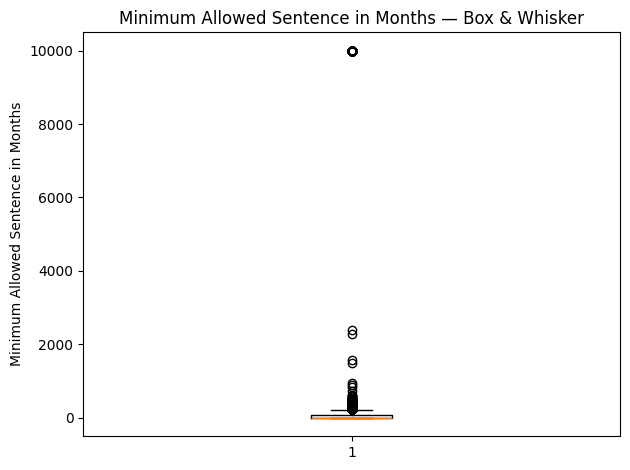

In [ ]:
plt.figure()
plt.boxplot(df_comb['minimum_allowed_sentence_months'].values, vert=True, showfliers=True)
plt.title('Minimum Allowed Sentence in Months — Box & Whisker')
plt.ylabel('Minimum Allowed Sentence in Months')
plt.tight_layout()
plt.show()

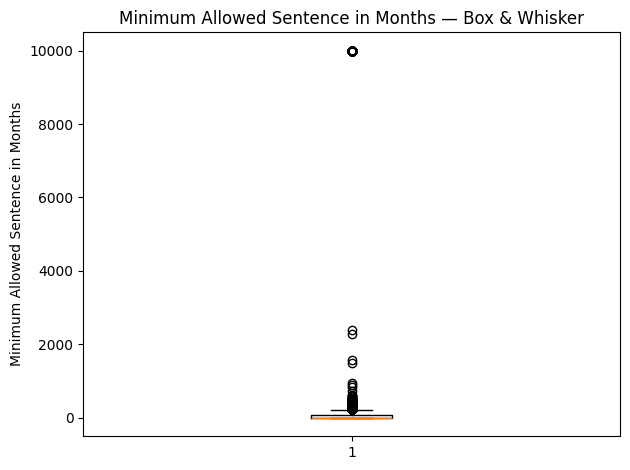

In [ ]:
plt.figure()
plt.boxplot(df_comb['minimum_allowed_sentence_months'].values, vert=True, showfliers=True)
plt.title('Minimum Allowed Sentence in Months — Box & Whisker')
plt.ylabel('Minimum Allowed Sentence in Months')
plt.tight_layout()
plt.show()

## Offense Severity

In [ ]:
df_comb.isna().sum()

,0
age_group,0
fine_amount,0
criminal_history_dummy,0
sentenced_to_days_in_prison_dummy,0
fine_imposed_dummy,0
gender,0
citizenship_dummy,0
conviction_thru_plea_or_trial_dummy,0
education_level,0
number_of_crimes_committed,0


In [ ]:
df_comb = df_comb.drop(columns=['offense', 'offense_type', "offense_severity"])

In [ ]:
df_comb.number_of_crimes_committed.value_counts(ascending=False)

,count
number_of_crimes_committed,
1.00,64852
2.00,11553
1,8577
3.00,3548
10,2670
...,...
70.00,1
71.00,1
52.00,1


## Number of Crimes Committed

**Below:** I am filling in the NaNs for number_of_crimes_committed with one, indicating that all individuals were atleast brought up on charges for at least one crime.

In [ ]:
df_comb['number_of_crimes_committed'] = pd.to_numeric(df_comb['number_of_crimes_committed'], errors='coerce')

In [ ]:
df_comb.number_of_crimes_committed.value_counts(ascending=False)

,count
number_of_crimes_committed,
1.00,73429
2.00,12500
3.00,3549
10.00,2894
4.00,1984
...,...
70.00,1
71.00,1
52.00,1


In [ ]:
df_comb['number_of_crimes_committed'] = df_comb['number_of_crimes_committed'].fillna(1.00)

In [ ]:
df_comb.isna().sum()

,0
age_group,0
fine_amount,0
criminal_history_dummy,0
sentenced_to_days_in_prison_dummy,0
fine_imposed_dummy,0
gender,0
citizenship_dummy,0
conviction_thru_plea_or_trial_dummy,0
education_level,0
number_of_crimes_committed,0


In [ ]:
df_comb.to_csv("/content/drive/MyDrive/Mellors - MSDS 696 - Practicum 2/df_clean.csv", index=False)